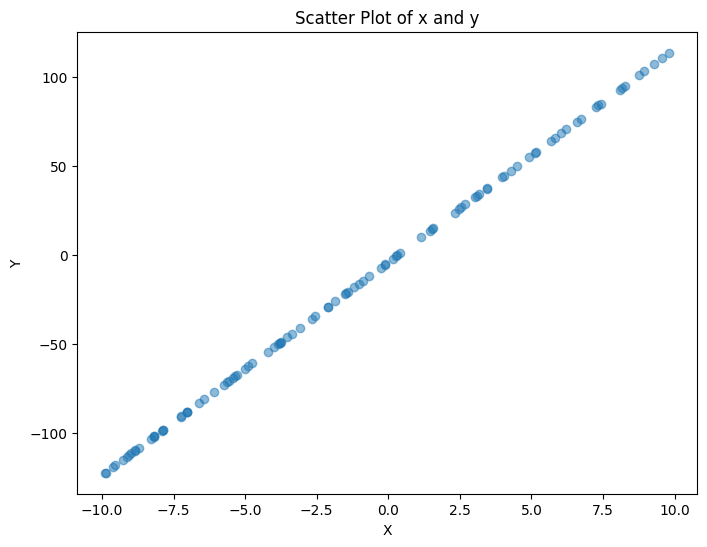

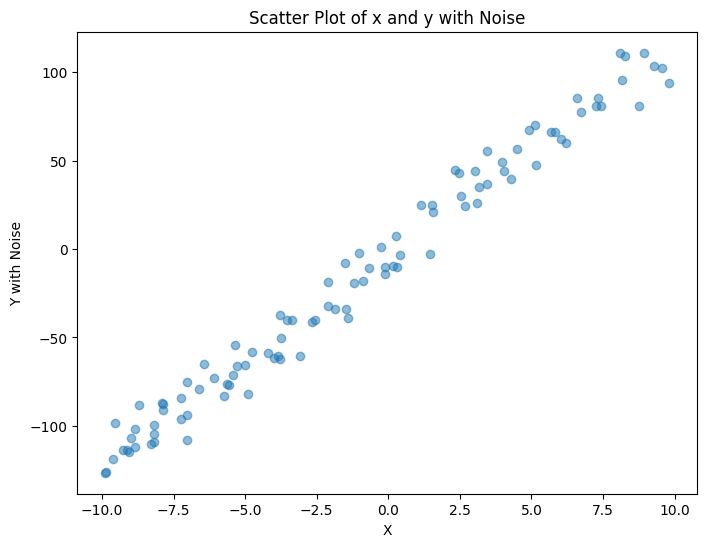

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed to the last two digits of my student number
seed = 46
np.random.seed(seed)

# Step a: Sample 100 numbers from a uniform distribution
x = np.random.uniform(-10, 10, 100)  # Adjust the range as needed

# Step b: Generate y data
y = 12 * x - 4

# Step c: Generate scatter plot of x and y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title("Scatter Plot of x and y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Step e: Add noise to y
noise = np.random.normal(0, 10, 100)
y_with_noise = y + noise

# Reproduce the scatter plot with noise
plt.figure(figsize=(8, 6))
plt.scatter(x, y_with_noise, alpha=0.5)
plt.title("Scatter Plot of x and y with Noise")
plt.xlabel("X")
plt.ylabel("Y with Noise")
plt.show()

# Analyze the difference between the two plots in your report

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step a: Load the data into a DataFrame
ecom_exp_hardiksinh = pd.read_csv('Ecom Expense.csv')  # Replace with your file path

#Data cleaning to strip spaces from column names
column_rename_dict = {col: col.strip() for col in ecom_exp_hardiksinh.columns}
ecom_exp_hardiksinh.rename(columns=column_rename_dict, inplace=True)

In [34]:
# Step b: Initial Exploration
print(ecom_exp_hardiksinh.head(3))
print(ecom_exp_hardiksinh.shape)
print(ecom_exp_hardiksinh.columns)
print(ecom_exp_hardiksinh.dtypes)
print(ecom_exp_hardiksinh.isnull().sum())  # Missing values per column

  Transaction ID  Age  Items  Monthly Income  Transaction Time  Record  \
0         TXN001   42     10            7313        627.668127       5   
1         TXN002   24      8           17747        126.904567       3   
2         TXN003   47     11           22845        873.469701       2   

   Gender City Tier  Total Spend  
0  Female    Tier 1  4198.385084  
1  Female    Tier 2  4134.976648  
2    Male    Tier 2  5166.614455  
(2362, 9)
Index(['Transaction ID', 'Age', 'Items', 'Monthly Income', 'Transaction Time',
       'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype='object')
Transaction ID       object
Age                   int64
Items                 int64
Monthly Income        int64
Transaction Time    float64
Record                int64
Gender               object
City Tier            object
Total Spend         float64
dtype: object
Transaction ID      0
Age                 0
Items               0
Monthly Income      0
Transaction Time    0
Record              

Column 'Gender' does not exist, skipping...
Column 'City Tier' does not exist, skipping...
    Age     Items  Monthly Income  Transaction Time  Record  Total Spend  \
0  0.55  0.642857        0.189663          0.627058     0.5     0.241242   
1  0.10  0.500000        0.562346          0.126412     0.3     0.236305   

   Gender_Female  Gender_Male  City Tier_Tier 1  City Tier_Tier 2  \
0            1.0          0.0               1.0               0.0   
1            1.0          0.0               0.0               1.0   

   City Tier_Tier 3  
0               0.0  
1               0.0  


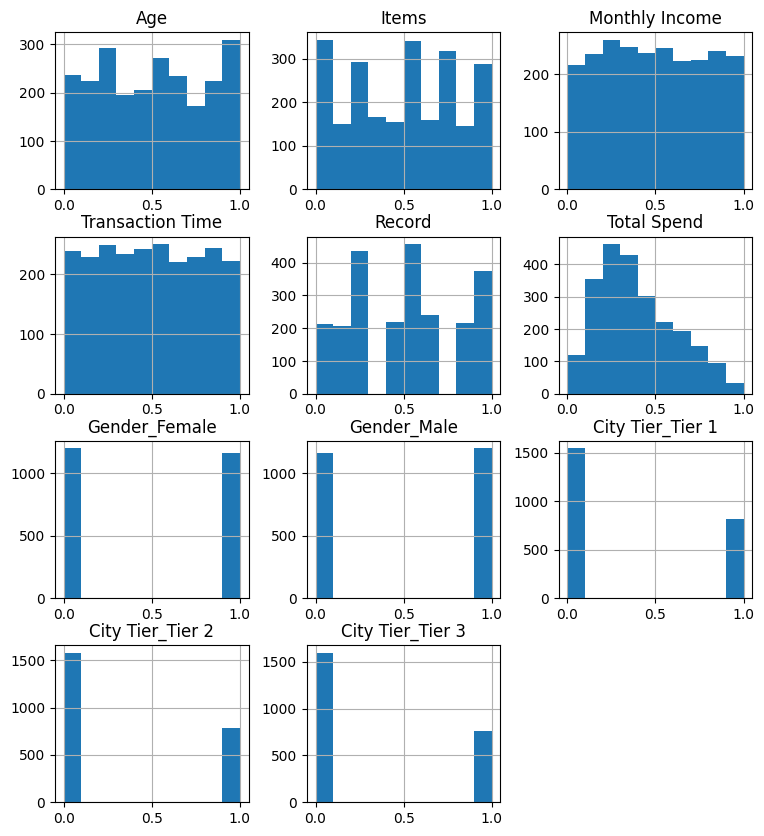

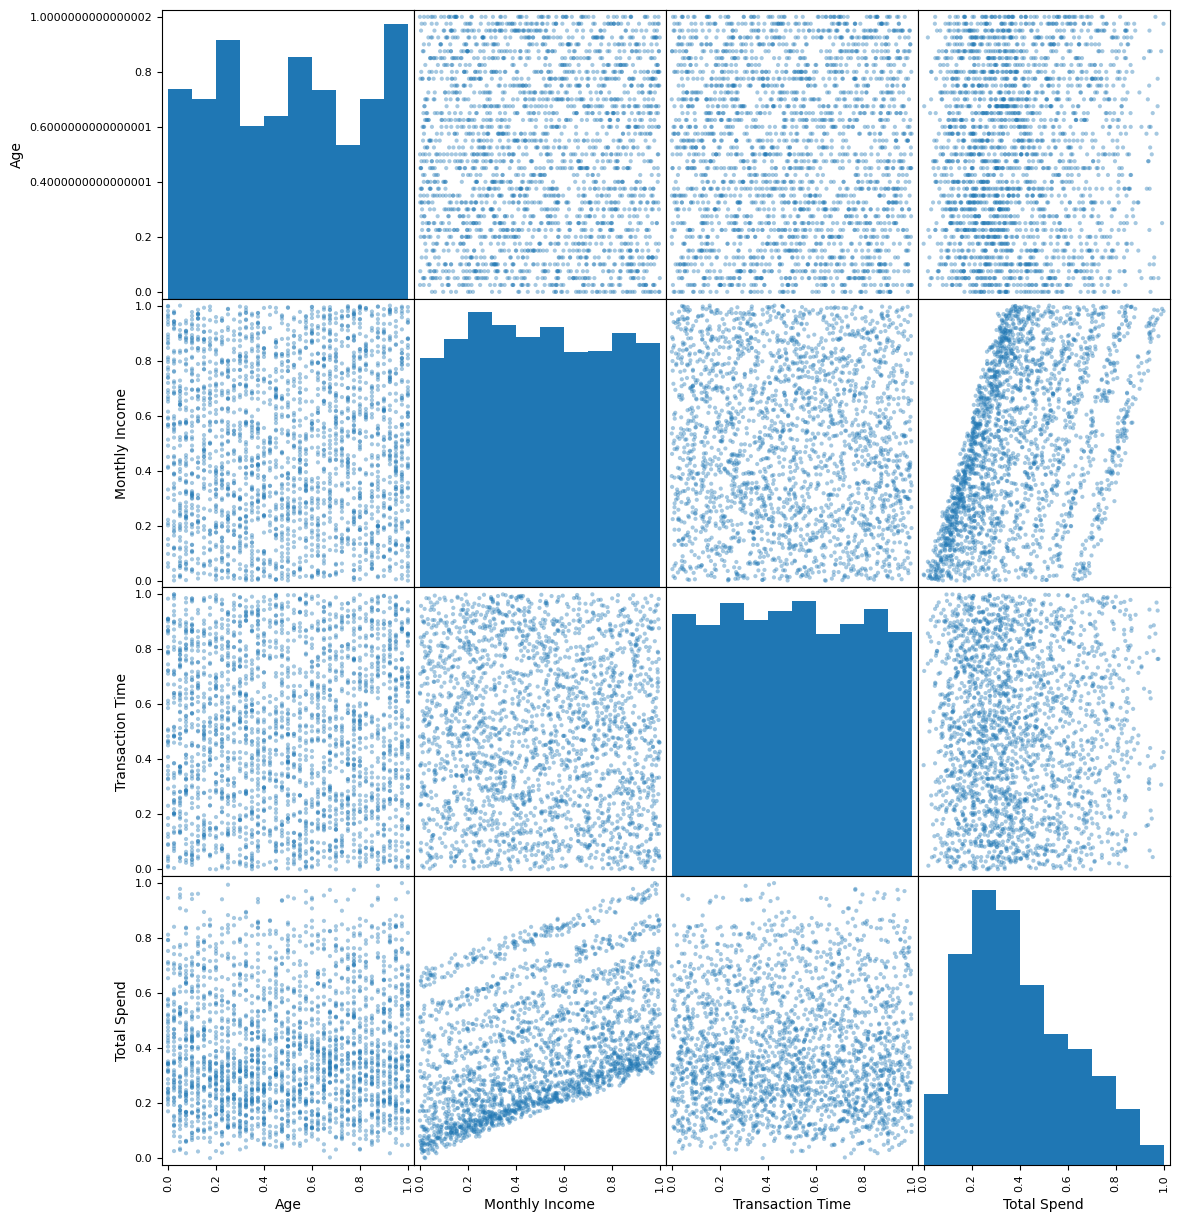

In [35]:
# Step c: Data Transformation
# i. Using "Get Dummies" transform categorical variables
ecom_exp_hardiksinh = pd.get_dummies(ecom_exp_hardiksinh, columns=['Gender','City Tier'])

# ii. Remove the original categorical columns and  Remove the 'Transaction ID' column
columns_to_drop = ['Gender', 'City Tier', 'Transaction ID']  # Replace with the actual column names

for column in columns_to_drop:
    if column in ecom_exp_hardiksinh.columns:
        ecom_exp_hardiksinh.drop(column, axis=1, inplace=True)
    else:
        print(f"Column '{column}' does not exist, skipping...")

# iv. Write a function to normalize the data
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

# v. Normalize the transformed DataFrame
ecom_exp_hardiksinh = normalize_df(ecom_exp_hardiksinh)

# vi. Display the first two records
print(ecom_exp_hardiksinh.head(2))

# vii. Generate histograms for all variables
ecom_exp_hardiksinh.hist(figsize=(9, 10))
plt.show()

# viii. Generate a scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(
    ecom_exp_hardiksinh[['Age', 'Monthly Income', 'Transaction Time', 'Total Spend']],
    alpha=0.4,
    figsize=(13, 15)
)
plt.show()

In [39]:
# Step d: Build a model
# i. Define features and target variable
features = ecom_exp_hardiksinh[['Monthly Income', 'Transaction Time', 'Gender_Female','Gender_Male','City Tier_Tier 1','City Tier_Tier 2','City Tier_Tier 3']]
target = ecom_exp_hardiksinh['Total Spend']

# ii. Split the data into training and testing sets
x_train_hardiksinh, x_test_hardiksinh, y_train_hardiksinh, y_test_hardiksinh = train_test_split(features, target, test_size=0.35, random_state=seed)

# iii. Fit a linear regression model to the training data
model = LinearRegression()
model.fit(x_train_hardiksinh, y_train_hardiksinh)

# iv. Display the coefficients
print("Coefficients:", model.coef_)

# v. Display the R2 score
train_score = model.score(x_train_hardiksinh, y_train_hardiksinh)
print("R2 Score (Training):", train_score)

# viii. Add 'Record' feature to predictors
features = ecom_exp_hardiksinh[['Monthly Income', 'Transaction Time', 'Gender_Female','Gender_Male','City Tier_Tier 1','City Tier_Tier 2','City Tier_Tier 3', 'Record']]

# ix. Split the data with 'Record' into training and testing sets
x_train_with_record, x_test_with_record, y_train_with_record, y_test_with_record = train_test_split(features, target, test_size=0.35, random_state=seed)

# x. Fit a linear regression model to the training data
model_with_record = LinearRegression()
model_with_record.fit(x_train_with_record, y_train_with_record)

# xi. Display the coefficients
print("Coefficients (with Record):", model_with_record.coef_)

# xii. Display the R2 score
train_score_with_record = model_with_record.score(x_train_with_record, y_train_with_record)
print("R2 Score (with Record, Training):", train_score_with_record)


Coefficients: [ 0.33927126  0.01645378 -0.00291748  0.00291748  0.01247756 -0.00079335
 -0.01168421]
R2 Score (Training): 0.19964798263857497
Coefficients (with Record): [ 0.32340611  0.01370799 -0.00901047  0.00901047  0.00421619  0.00455308
 -0.00876926  0.60166527]
R2 Score (with Record, Training): 0.9187790657570485
